<a href="https://colab.research.google.com/github/rofiat13/data-science-ML-projects/blob/main/Apple_Fruit_Quality_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The quality of Apple fruits is determine if its mature, firm, clean, fresh and well
formed and shall have color and shape characteristics of variety. Apple fruits must
have smooth and shiny surface. It shall be free from hail marks/spots, russet, scald
or any type of fungus or diseases.

# About Dataset:

This dataset contains information about various attributes of a set of apple fruits,
providing insights into its characteristics. The dataset includes information such as
fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.
1. A_id: Unique identifier for each fruit
2. Size: Size of the fruit
3. Weight: Weight of the fruit
4. Sweetness: Degree of sweetness of the fruit
5. Crunchiness: Texture indicating the crunchiness of the fruit
6. Juiciness: Level of juiciness of the fruit
7. Ripeness: Stage of ripeness of the fruit
8. Acidity: Acidity level of the fruit
9. Quality: Overall quality of the fruit
These model is use to predict the quality rating of Apple fruits using various
attributes/characterictics.It will develop a classification model to categorize fruits based on their
features.
A

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read dataset
apple_quality = pd.read_csv("apple_quality.csv")
apple_quality.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
# shape of the dataset
apple_quality.shape

(4001, 9)

In [ ]:
apple_quality.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
apple_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
# drop the id column
apple_quality = apple_quality.drop(['A_id'], axis=1)

In [ ]:
# check for missing values
apple_quality.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
# Description of the data
apple_quality.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
# drop missing values
apple_quality.dropna(inplace=True)

In [ ]:
apple_quality.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Text(0.5, 1.0, 'Outliers in Juciness Column')

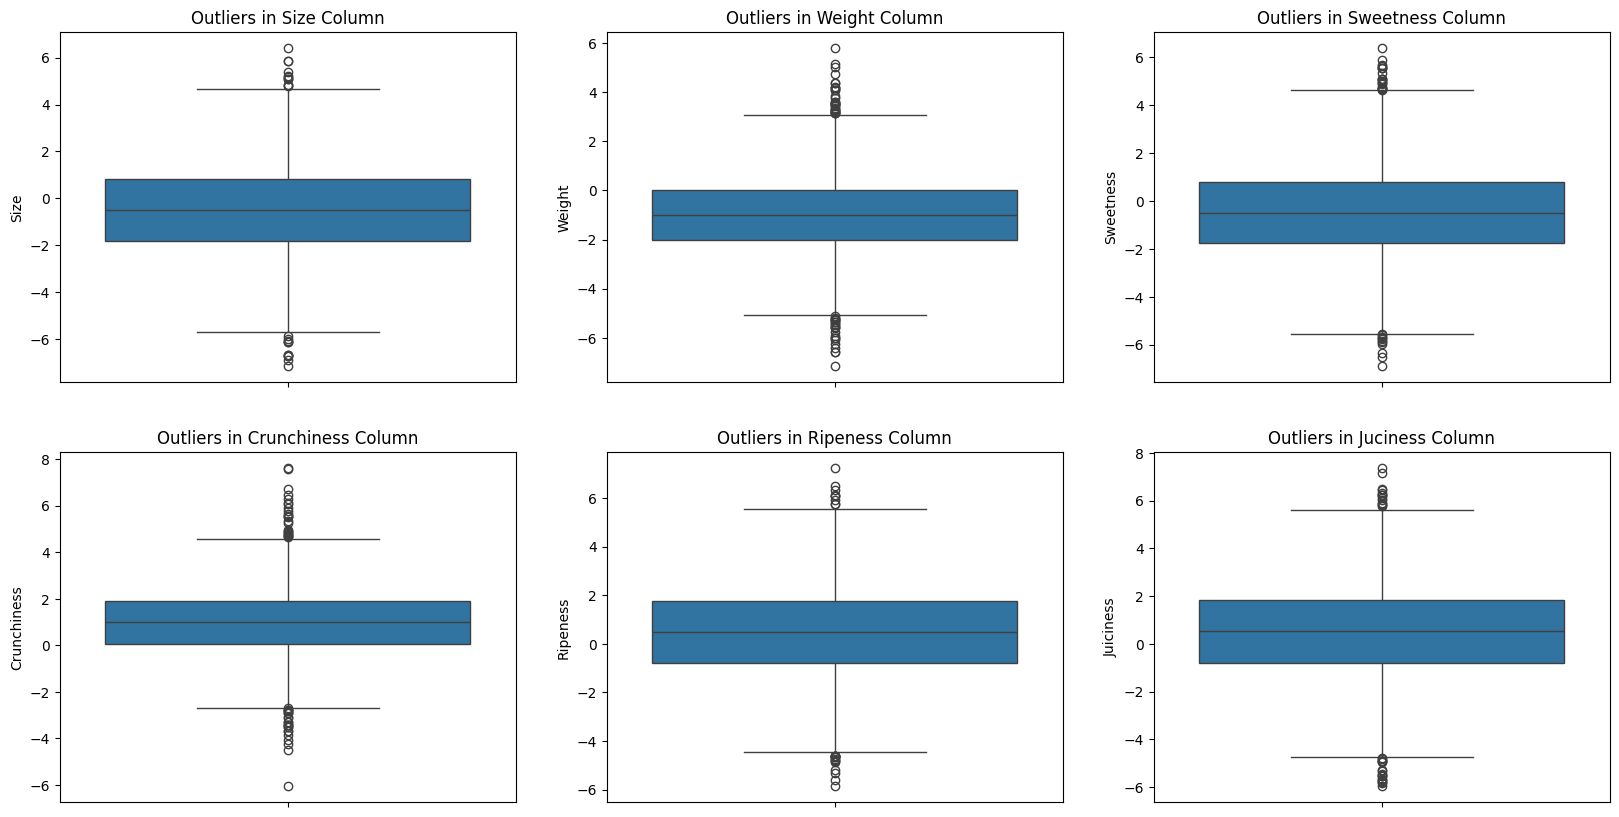

In [ ]:
# check for outliers using boxplot
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(apple_quality['Size'])
plt.title("Outliers in Size Column")

plt.subplot(2,3,2)
sns.boxplot(apple_quality['Weight'])
plt.title("Outliers in Weight Column")

plt.subplot(2,3,3)
sns.boxplot(apple_quality['Sweetness'])
plt.title("Outliers in Sweetness Column")

plt.subplot(2,3,4)
sns.boxplot(apple_quality['Crunchiness'])
plt.title("Outliers in Crunchiness Column")

plt.subplot(2,3,5)
sns.boxplot(apple_quality['Ripeness'])
plt.title("Outliers in Ripeness Column")

plt.subplot(2,3,6)
sns.boxplot(apple_quality['Juiciness'])
plt.title("Outliers in Juciness Column")


In [ ]:
# remove outliers using the interquartile range
def remove_outliers(data):
    # Calculate quartiles, IQR, and bounds for each column
    numerical_columns = apple_quality.select_dtypes(include=[np.number]).columns
    for column in  numerical_columns:
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Count data lower and higher than the bounds
        lower_count = np.sum(data[column] < lower_bound)
        upper_count = np.sum(data[column] > upper_bound)

        # Print information for the current column
        print(f"Column: {column}")
        print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Count of data lower than lower bound: {lower_count}")
        print(f"Count of data higher than upper bound: {upper_count}")

        # Remove outliers
        data[column] = data[column][(data[column] > lower_bound) & (data[column] < upper_bound)]

remove_outliers(apple_quality)


Column: Size
Q1: -1.816764527, Q3: 0.8055264495000001, IQR: 2.6222909765
Lower Bound: -5.75020099175, Upper Bound: 4.73896291425
Count of data lower than lower bound: 11
Count of data higher than upper bound: 11
Column: Weight
Q1: -2.01177029275, Q3: 0.03097644, IQR: 2.04274673275
Lower Bound: -5.075890391874999, Upper Bound: 3.0950965391249996
Count of data lower than lower bound: 23
Count of data higher than upper bound: 31
Column: Sweetness
Q1: -1.7384250625, Q3: 0.8019219209999999, IQR: 2.5403469835
Lower Bound: -5.54894553775, Upper Bound: 4.61244239625
Count of data lower than lower bound: 11
Count of data higher than upper bound: 21
Column: Crunchiness
Q1: 0.06276439525000001, Q3: 1.8942342170000002, IQR: 1.83146982175
Lower Bound: -2.6844403373750003, Upper Bound: 4.641438949625
Count of data lower than lower bound: 23
Count of data higher than upper bound: 24
Column: Juiciness
Q1: -0.80128581525, Q3: 1.8359763875, IQR: 2.6372622027499997
Lower Bound: -4.7571791193749995, Upper

In [ ]:
# outliers removed now showing as NaN
apple_quality.isnull().sum()

Size           22
Weight         54
Sweetness      32
Crunchiness    47
Juiciness      32
Ripeness       24
Acidity         0
Quality         0
dtype: int64

In [ ]:
# drop the new missing values
apple_quality.dropna(inplace=True)

Text(0.5, 1.0, 'Outliers in Juciness Column')

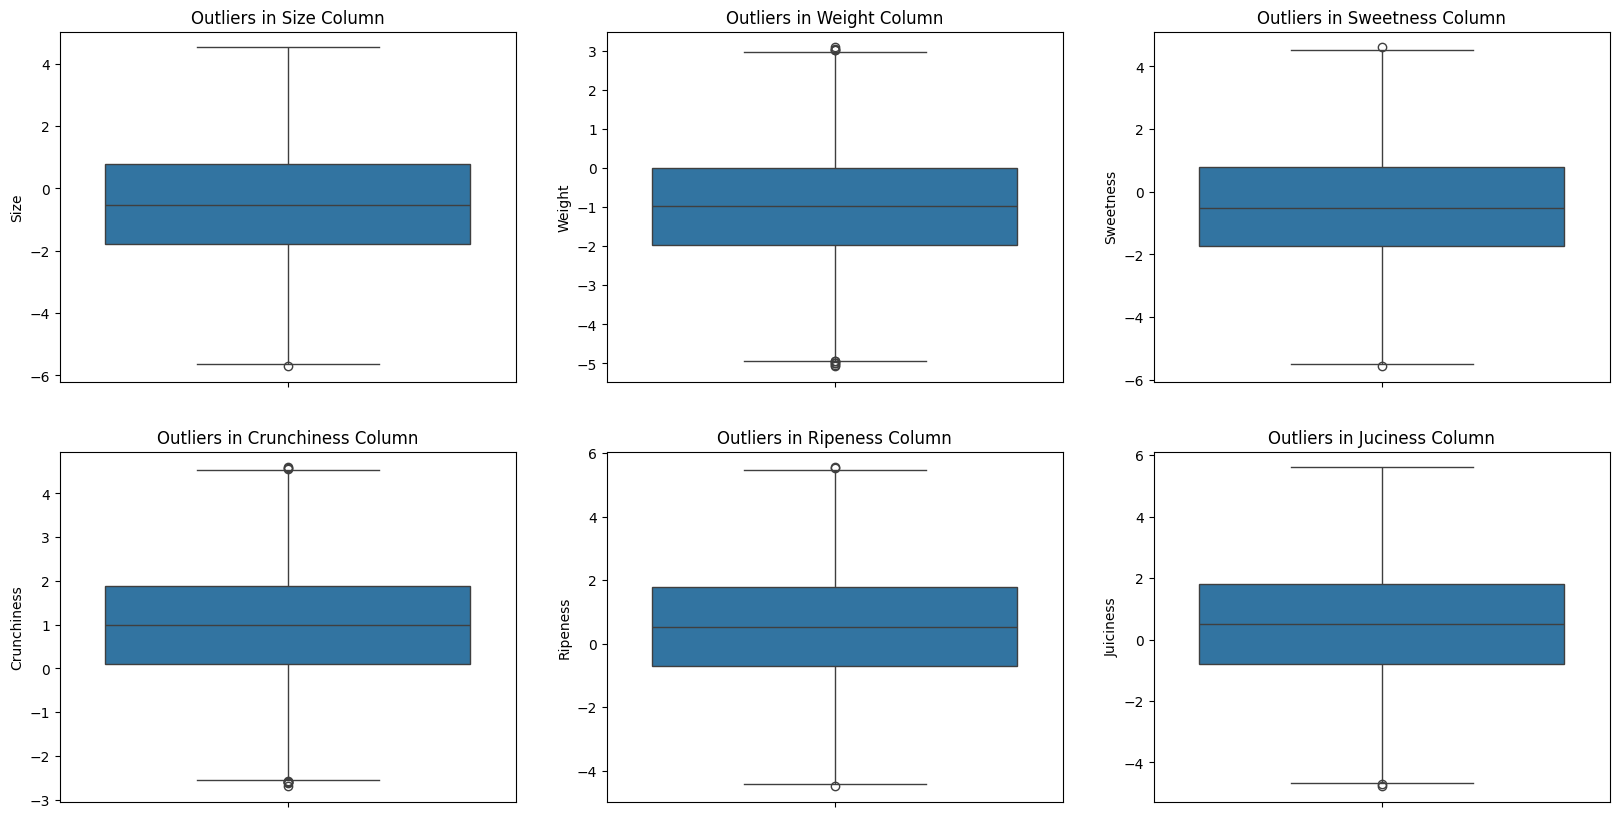

In [ ]:
# use boxplot to check if outliers have been removed
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(apple_quality['Size'])
plt.title("Outliers in Size Column")

plt.subplot(2,3,2)
sns.boxplot(apple_quality['Weight'])
plt.title("Outliers in Weight Column")

plt.subplot(2,3,3)
sns.boxplot(apple_quality['Sweetness'])
plt.title("Outliers in Sweetness Column")

plt.subplot(2,3,4)
sns.boxplot(apple_quality['Crunchiness'])
plt.title("Outliers in Crunchiness Column")

plt.subplot(2,3,5)
sns.boxplot(apple_quality['Ripeness'])
plt.title("Outliers in Ripeness Column")

plt.subplot(2,3,6)
sns.boxplot(apple_quality['Juiciness'])
plt.title("Outliers in Juiciness Column")

In [ ]:
apple_quality.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad


Text(0.5, 1.0, 'Distribution of Juiciness Column')

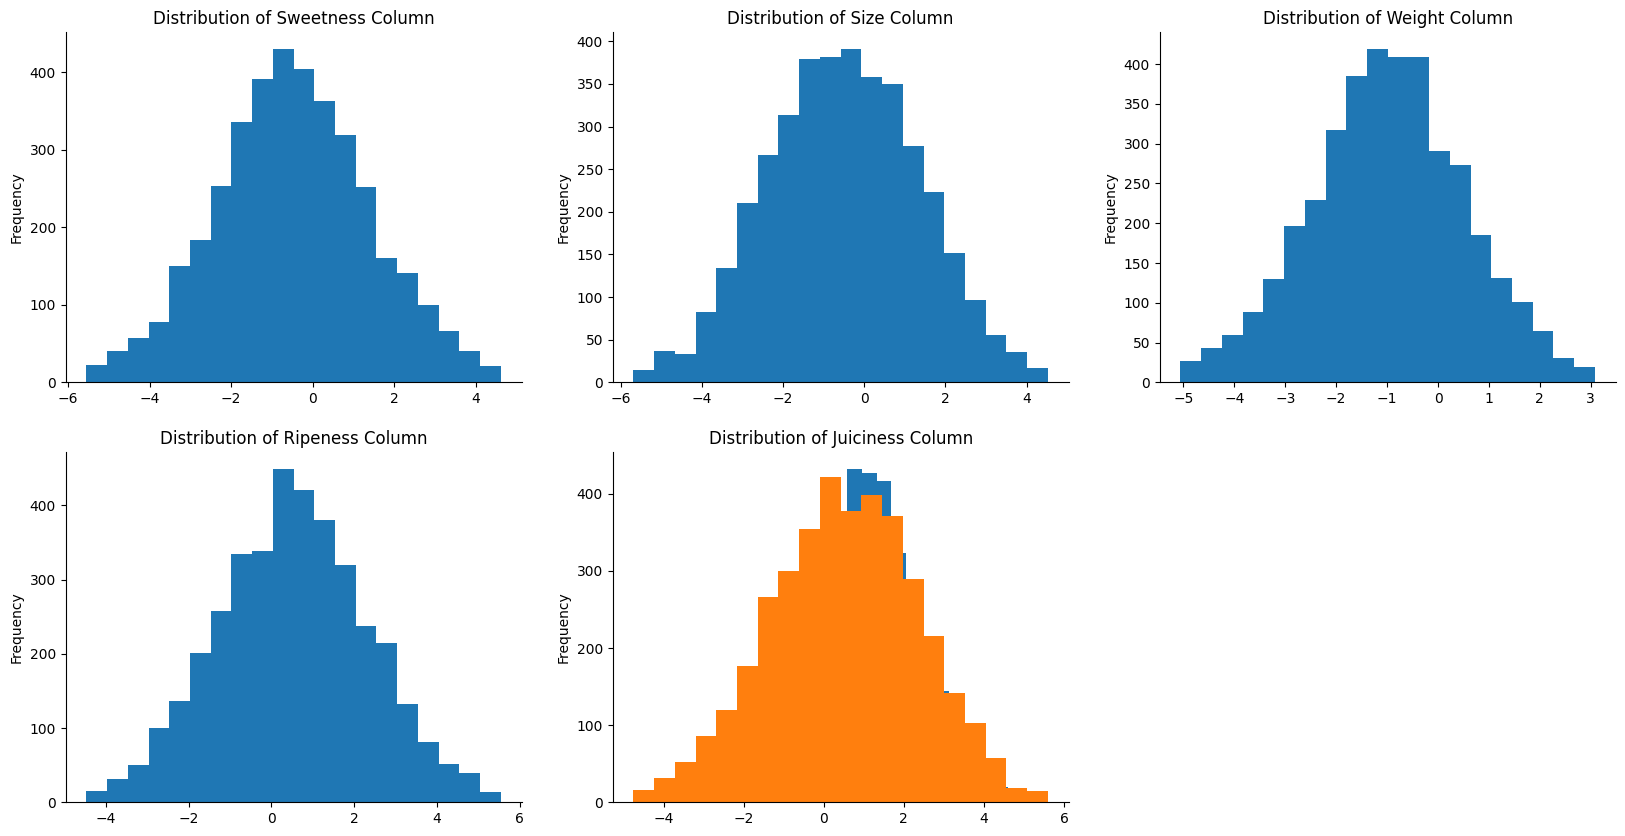

In [ ]:
# check for the distribution of the columns
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
apple_quality['Sweetness'].plot(kind='hist', bins=20, title='Sweetness')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Sweetness Column")

plt.subplot(2,3,2)
apple_quality['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Size Column")

plt.subplot(2,3,3)
apple_quality['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Weight Column")

plt.subplot(2,3,4)
apple_quality['Ripeness'].plot(kind='hist', bins=20, title='Ripeness')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Ripeness Column")

plt.subplot(2,3,5)
apple_quality['Crunchiness'].plot(kind='hist', bins=20, title='Crunchiness')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Crunchiness Column")

plt.subplot(2,3,5)
apple_quality['Juiciness'].plot(kind='hist', bins=20, title='Juiciness')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Juiciness Column")

In [ ]:
# count of the quality column
apple_quality.Quality.value_counts()

bad     1939
good    1868
Name: Quality, dtype: int64

Text(0.5, 1.0, 'Value Count of Quality Column')

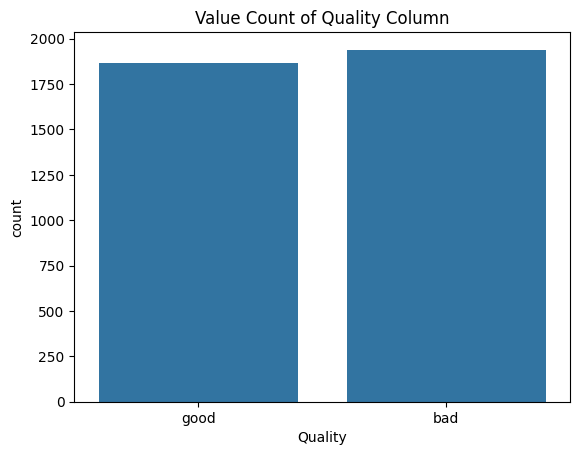

In [ ]:
# visualize the value count of the quality column
sns.countplot(data=apple_quality, x='Quality')
plt.title("Value Count of Quality Column")

<ipython-input-21-197907b8b8b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = apple_quality.corr()


<Axes: >

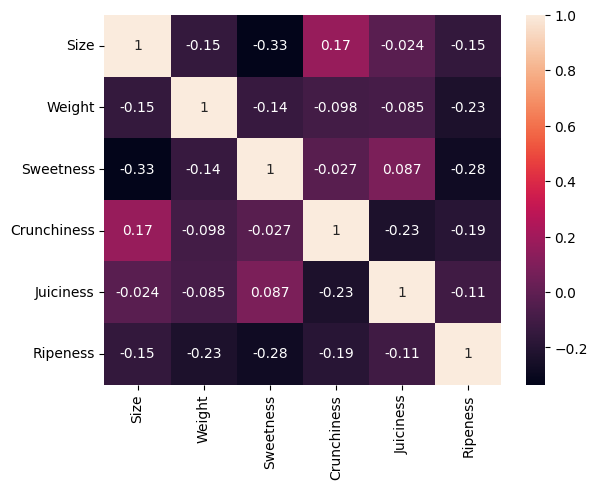

In [ ]:
# check for the correlation of the columns
corr = apple_quality.corr()
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Ripeness vs Weight')

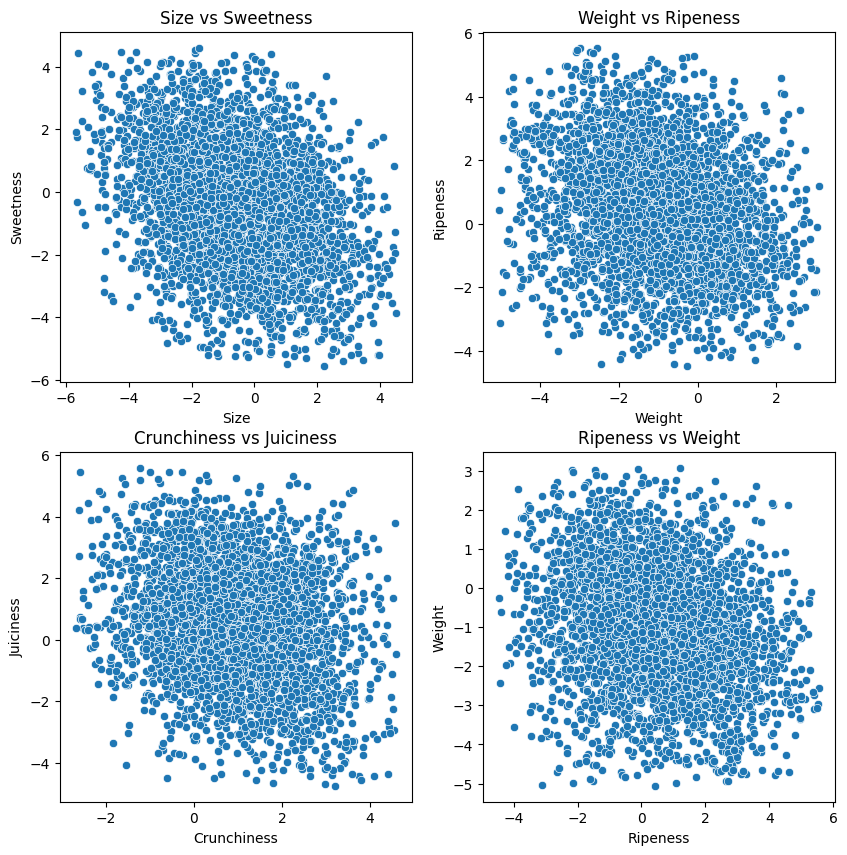

In [ ]:
# visualize the columns that are slightly correlated
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(data=apple_quality, x='Size', y='Sweetness')
plt.title("Size vs Sweetness")

plt.subplot(2,2,2)
sns.scatterplot(data=apple_quality, x='Weight', y='Ripeness')
plt.title("Weight vs Ripeness")

plt.subplot(2,2,3)
sns.scatterplot(data=apple_quality, x='Crunchiness', y='Juiciness')
plt.title("Crunchiness vs Juiciness")

plt.subplot(2,2,4)
sns.scatterplot(data=apple_quality, x='Ripeness', y='Weight')
plt.title("Ripeness vs Weight")



In [ ]:
# divide the data into feature variables(x) and target variables(y)
y= apple_quality['Quality']
X = apple_quality.drop(['Quality', 'Acidity'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
print([[y]])

[[array([1, 0, 1, ..., 0, 1, 1])]]


In [ ]:
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616


In [ ]:
# split into test and train set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2664, 6)
X_test shape: (1143, 6)
y_train shape: (2664,)
y_test shape: (1143,)


Logistic Regression

In [ ]:
# import the classification model and fit
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1)
logreg=logreg.fit(X_train, y_train)

In [ ]:
# predict using the test set
prediction=logreg.predict(X_test)
prediction

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
# check accuracy score
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
accuracy_score(y_test, prediction)

0.7436570428696413

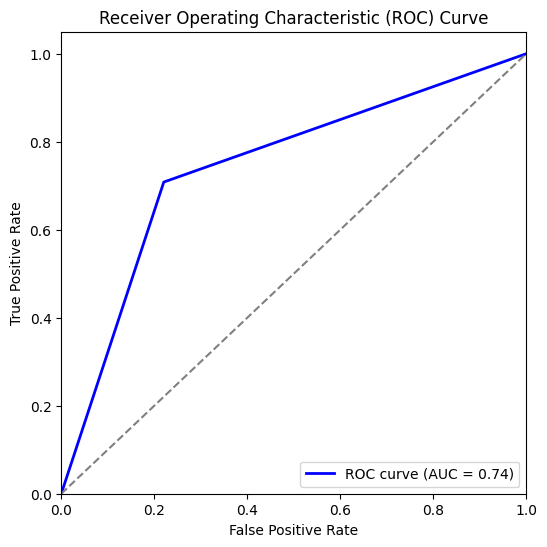

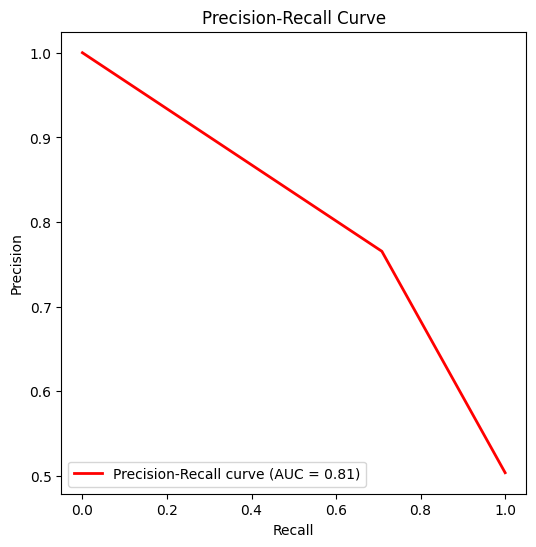

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, prediction)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
# check confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, prediction)
cm

array([[442, 125],
       [168, 408]])

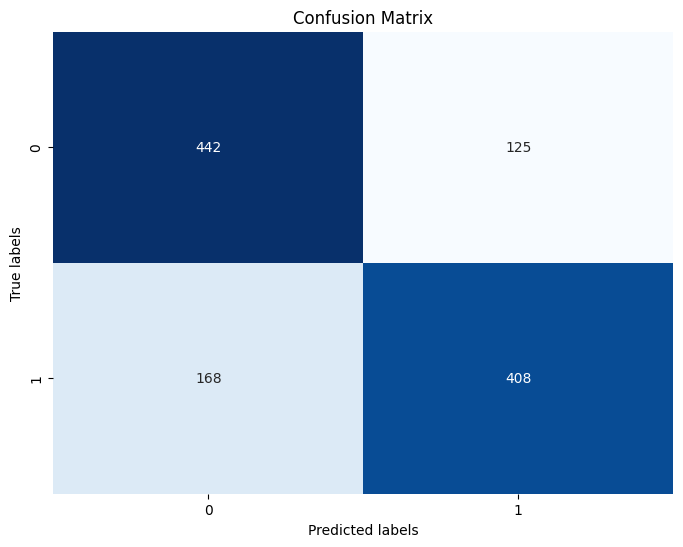

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       567
           1       0.77      0.71      0.74       576

    accuracy                           0.74      1143
   macro avg       0.75      0.74      0.74      1143
weighted avg       0.75      0.74      0.74      1143



K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
knn_prediction = knn_model.predict(X_test)
knn_prediction

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
# check accuracy score
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
accuracy_score(y_test, knn_prediction)

0.8626421697287839

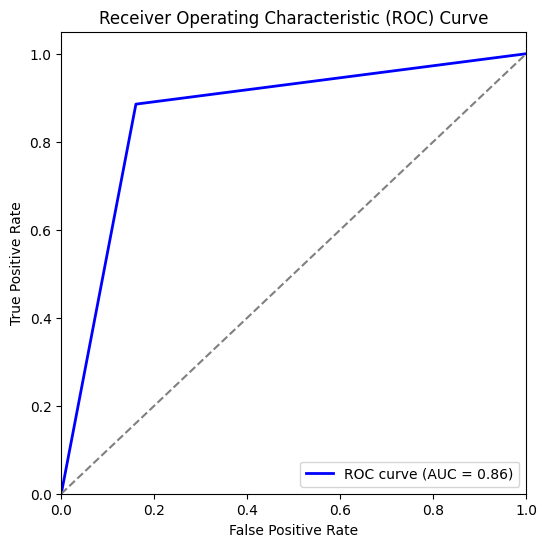

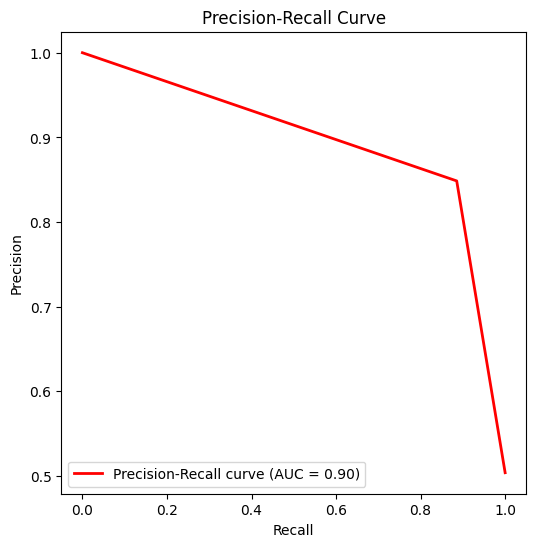

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, knn_prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, knn_prediction)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# check confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, knn_prediction)
cm

array([[476,  91],
       [ 66, 510]])

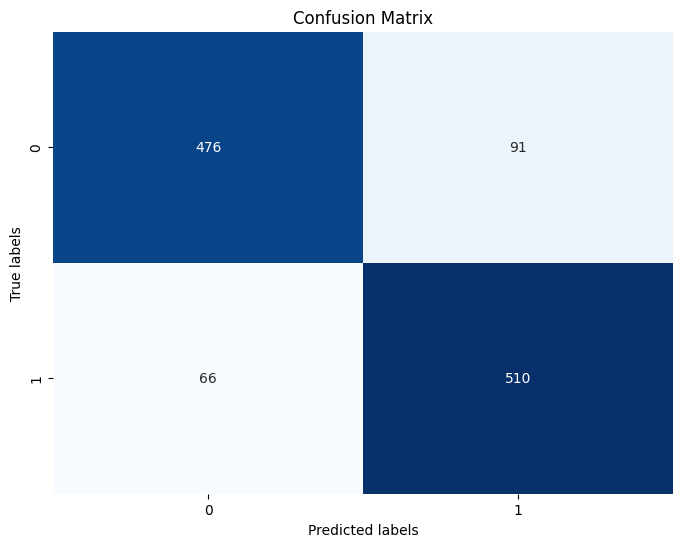

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

KNN Classifier did so much better than the Logistic Regression without any fine tuning